In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file='bank.csv'
bank_df = pd.read_csv('bank.csv', header=None,skiprows=1)
bank_df = bank_df[0].str.split(';', expand=True)
bank_df.columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

In [3]:
bank_df['balance'] = bank_df['balance'].astype(float)
bank_df['balance'] = bank_df['balance'].replace(',', '.', regex=True)
bank_df['age'] = bank_df['age'].astype(int)
bank_df['age'] = bank_df['age'].replace(' ', '0', regex=True)
bank_df['day'] = bank_df['day'].astype(int)
bank_df['day'] = bank_df['day'].replace(' ', '0', regex=True)
bank_df['campaign'] = bank_df['campaign'].astype(int)
bank_df['campaign'] = bank_df['campaign'].replace(' ', '0', regex=True)
bank_df['pdays'] = bank_df['pdays'].astype(int)
bank_df['pdays'] = bank_df['pdays'].replace(' ', '0', regex=True)
bank_df['previous'] = bank_df['previous'].astype(int)
bank_df['previous'] = bank_df['previous'].replace(' ', '0', regex=True)
bank_df['duration'] = bank_df['duration'].astype(int)
bank_df['duration'] = bank_df['duration'].replace(' ', '0', regex=True)

In [12]:
num=bank_df.select_dtypes(include=[np.number]).columns
num

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [13]:
cat=bank_df.select_dtypes(exclude=[np.number]).columns
cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [6]:
bank_df['job'].value_counts()

job
"management"       969
"blue-collar"      946
"technician"       768
"admin."           478
"services"         417
"retired"          230
"self-employed"    183
"entrepreneur"     168
"unemployed"       128
"housemaid"        112
"student"           84
"unknown"           38
Name: count, dtype: int64

In [18]:
for k in cat:
    keys=[]
    values=[]
    for key,val in bank_df[k].value_counts().items():
        keys.append(key)
        values.append(val)
    df_k=pd.DataFrame(zip(keys,values),columns=[k,'count'])
    print(df_k)

                job  count
0      "management"    969
1     "blue-collar"    946
2      "technician"    768
3          "admin."    478
4        "services"    417
5         "retired"    230
6   "self-employed"    183
7    "entrepreneur"    168
8      "unemployed"    128
9       "housemaid"    112
10        "student"     84
11        "unknown"     38
      marital  count
0   "married"   2797
1    "single"   1196
2  "divorced"    528
     education  count
0  "secondary"   2306
1   "tertiary"   1350
2    "primary"    678
3    "unknown"    187
  default  count
0    "no"   4445
1   "yes"     76
  housing  count
0   "yes"   2559
1    "no"   1962
    loan  count
0   "no"   3830
1  "yes"    691
       contact  count
0   "cellular"   2896
1    "unknown"   1324
2  "telephone"    301
    month  count
0   "may"   1398
1   "jul"    706
2   "aug"    633
3   "jun"    531
4   "nov"    389
5   "apr"    293
6   "feb"    222
7   "jan"    148
8   "oct"     80
9   "sep"     52
10  "mar"     49
11  "dec"    

In [17]:
for k in cat:
    print(bank_df[k])

0          "unemployed"
1            "services"
2          "management"
3          "management"
4         "blue-collar"
             ...       
4516         "services"
4517    "self-employed"
4518       "technician"
4519      "blue-collar"
4520     "entrepreneur"
Name: job, Length: 4521, dtype: object
0       "married"
1       "married"
2        "single"
3       "married"
4       "married"
          ...    
4516    "married"
4517    "married"
4518    "married"
4519    "married"
4520     "single"
Name: marital, Length: 4521, dtype: object
0         "primary"
1       "secondary"
2        "tertiary"
3        "tertiary"
4       "secondary"
           ...     
4516    "secondary"
4517     "tertiary"
4518    "secondary"
4519    "secondary"
4520     "tertiary"
Name: education, Length: 4521, dtype: object
0        "no"
1        "no"
2        "no"
3        "no"
4        "no"
        ...  
4516     "no"
4517    "yes"
4518     "no"
4519     "no"
4520     "no"
Name: default, Length: 4521, dtype: o

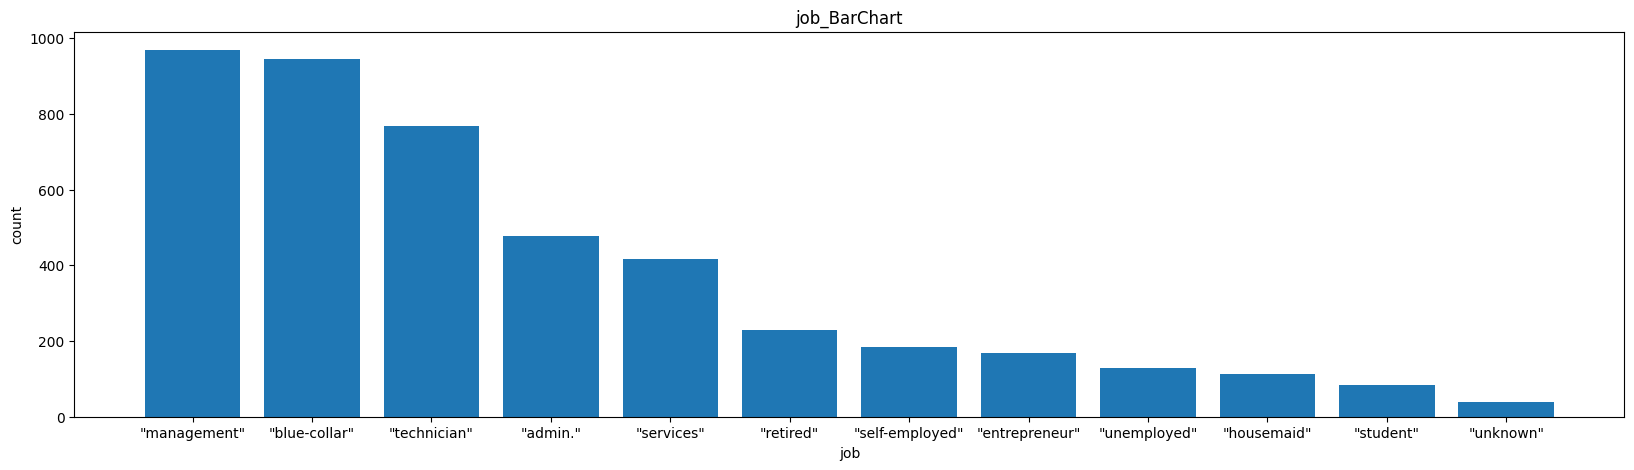

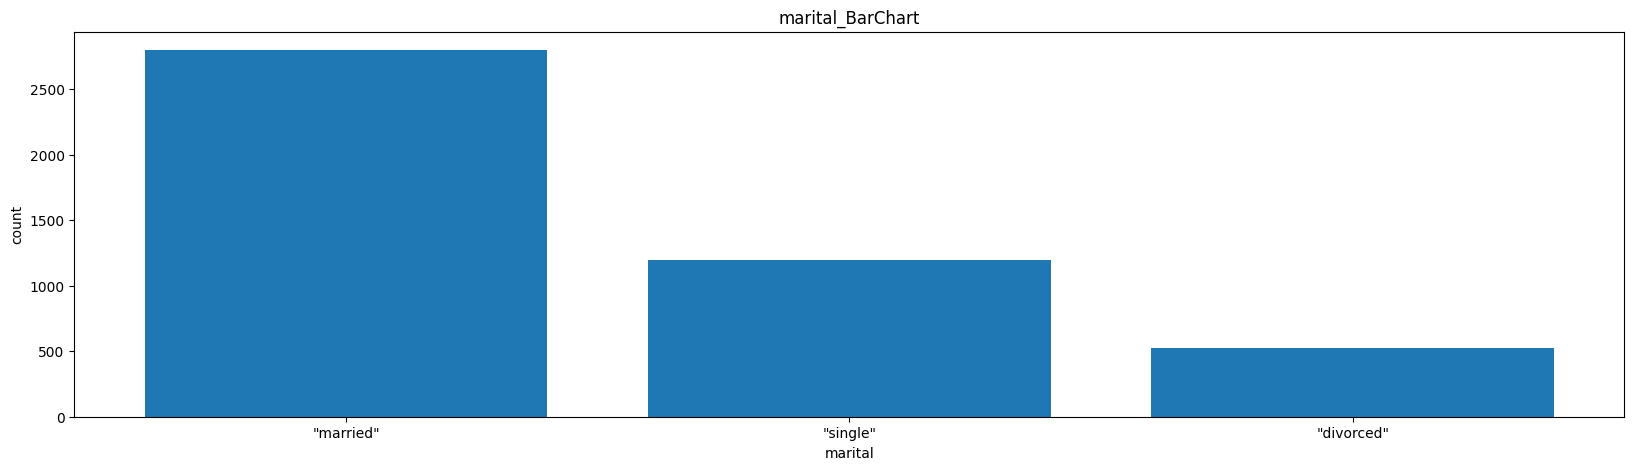

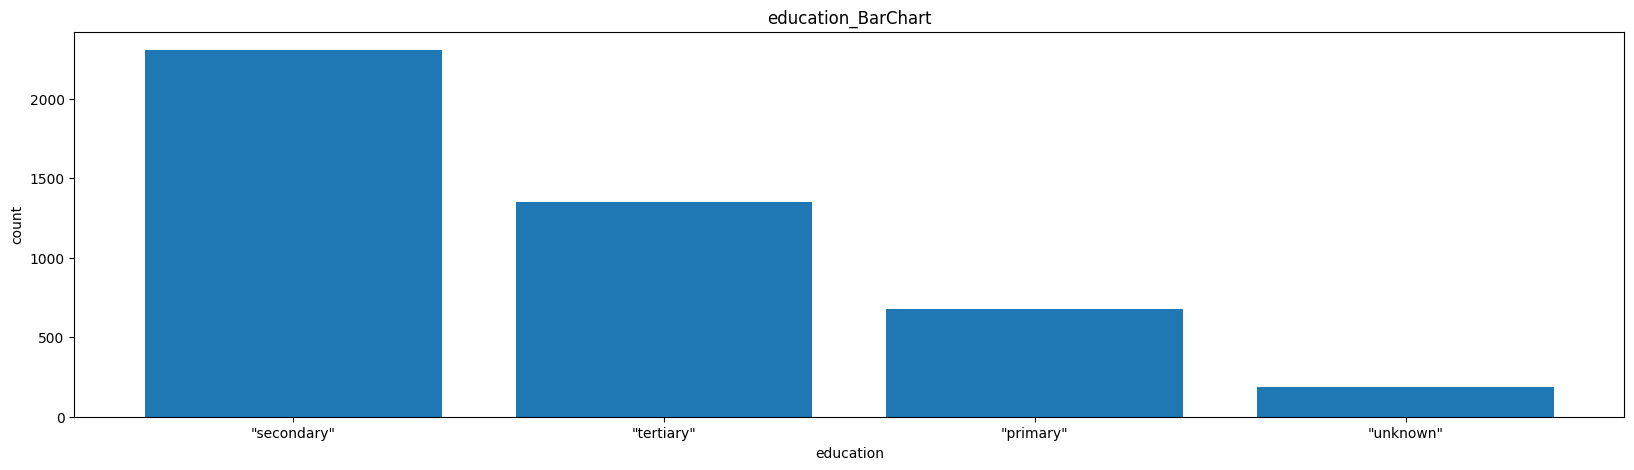

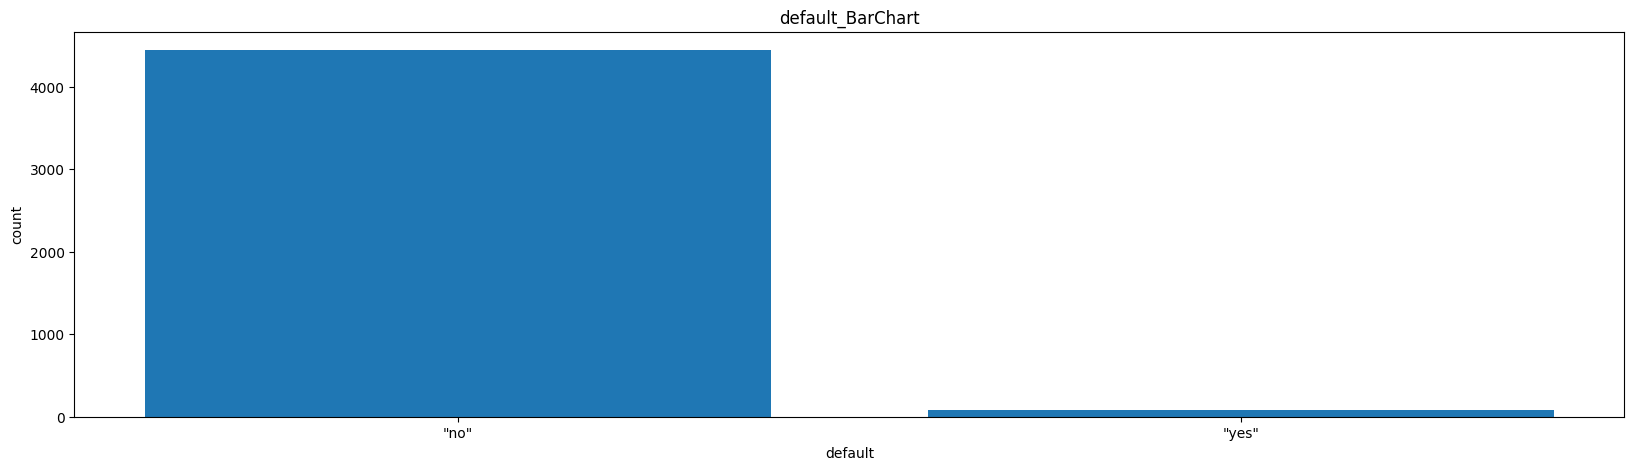

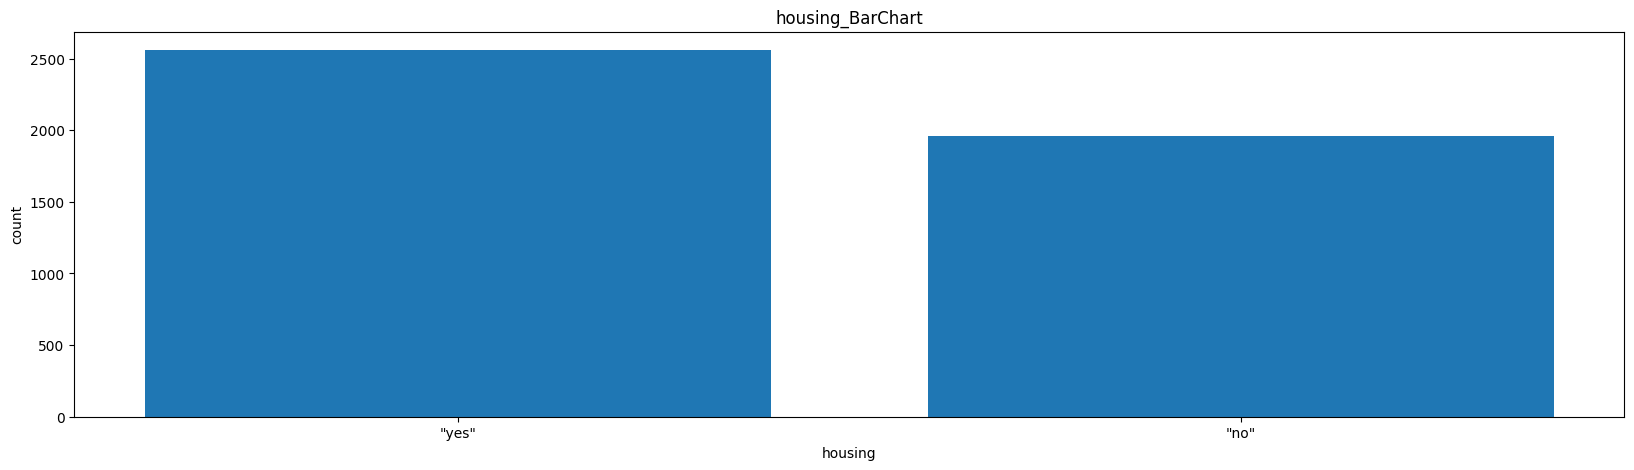

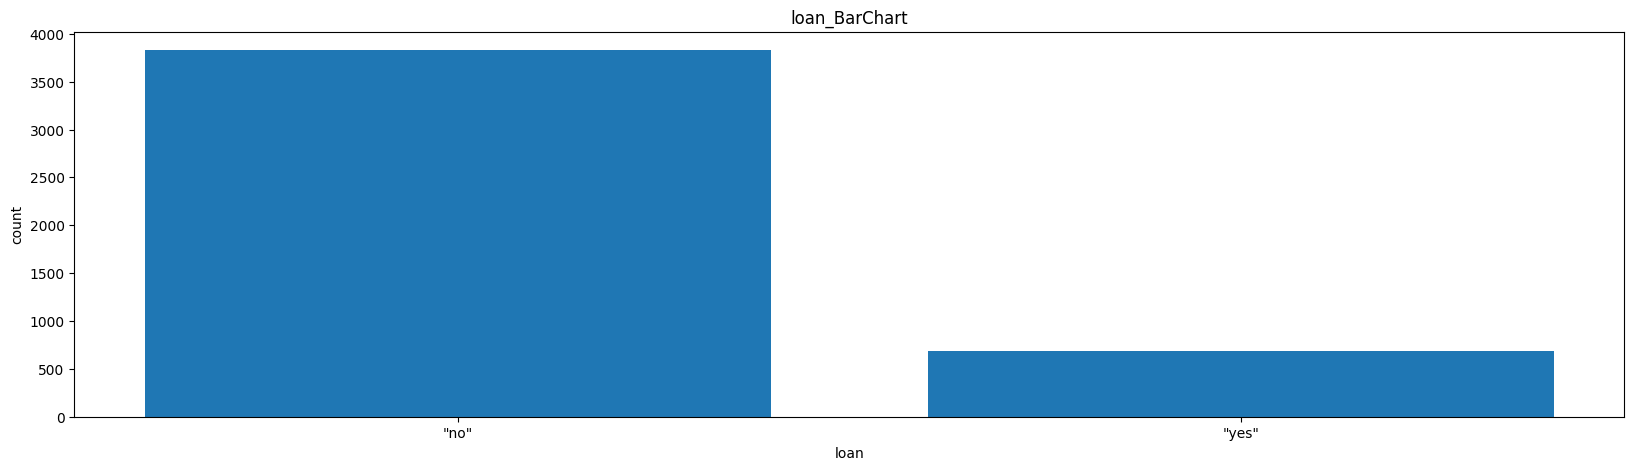

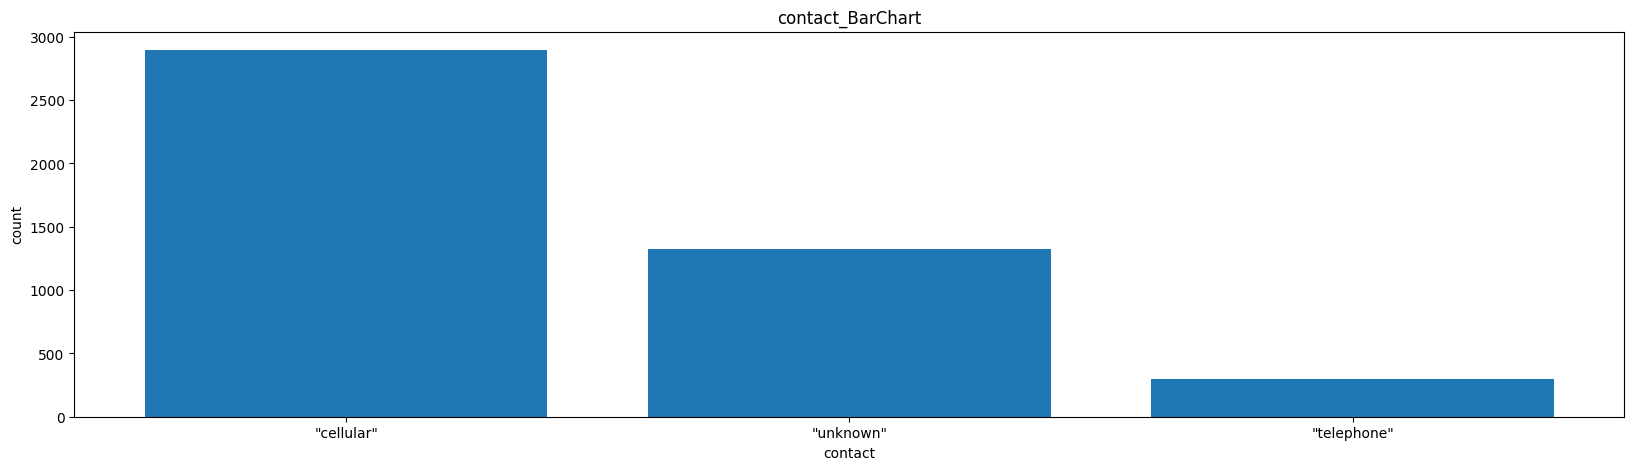

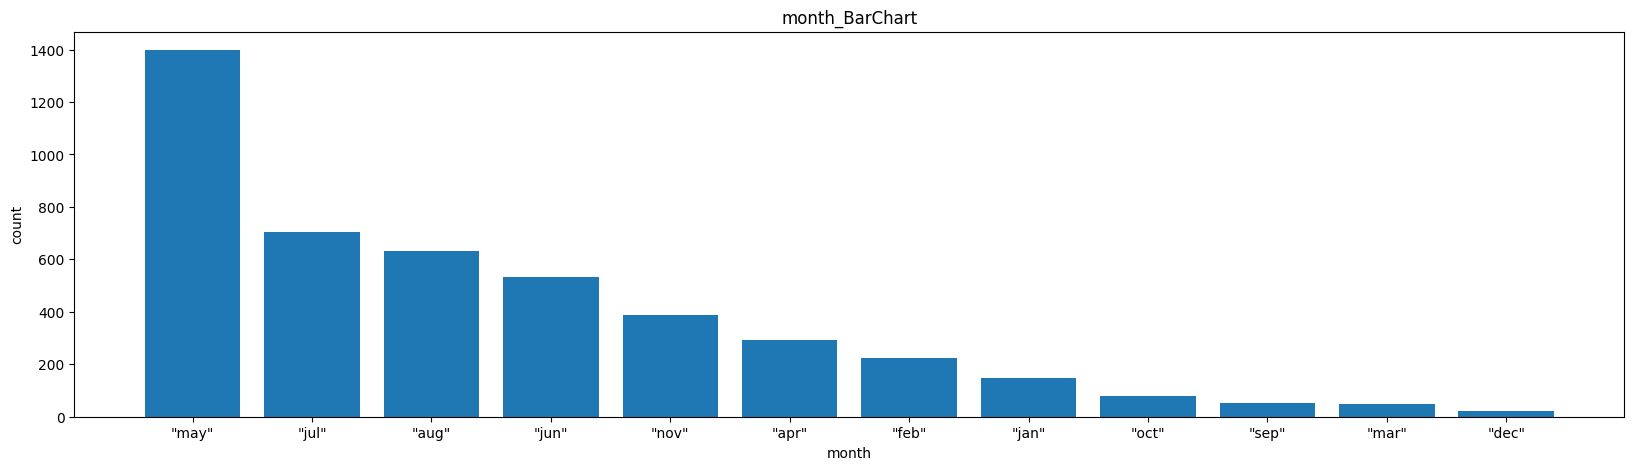

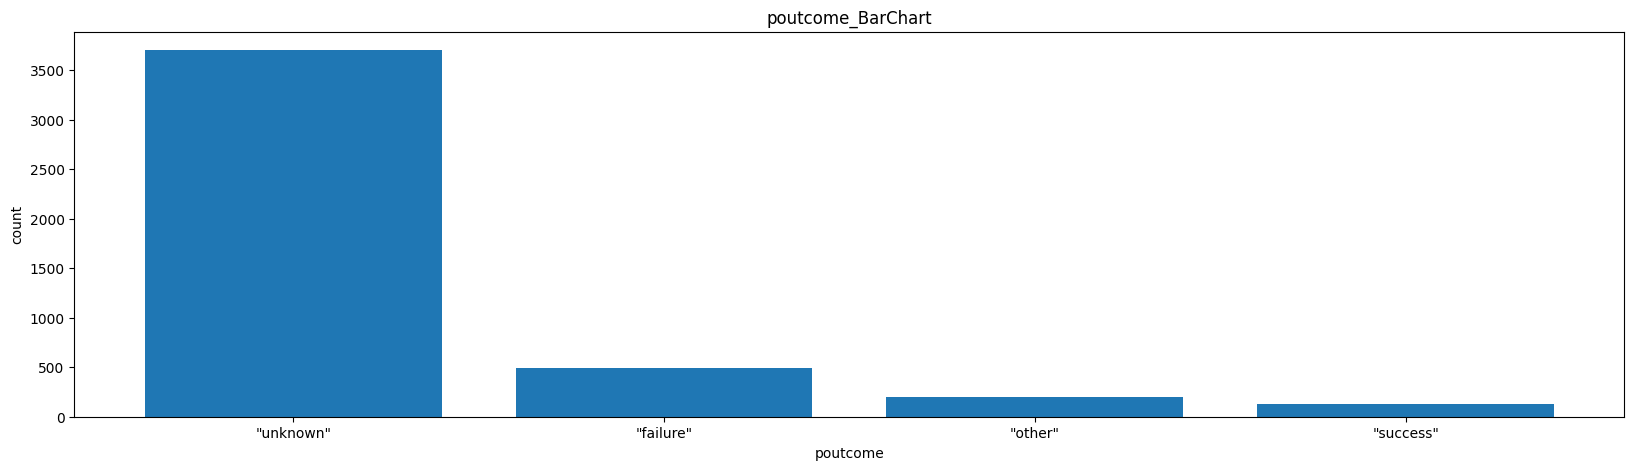

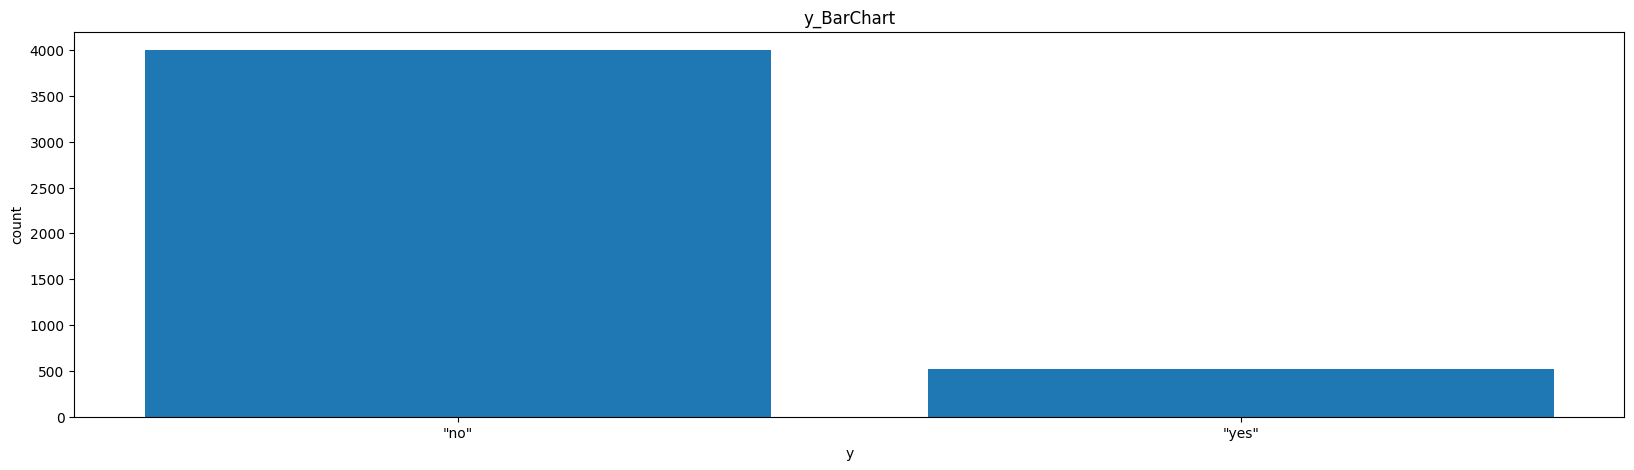

In [21]:
for k in cat:
    class_name=bank_df[k].value_counts().keys()
    class_freq=bank_df[k].value_counts().values
    plt.figure(figsize=(20,5))
    plt.bar(class_name,class_freq)
    plt.title(f'{k}_BarChart')
    plt.xlabel(k)   
    plt.ylabel('count')


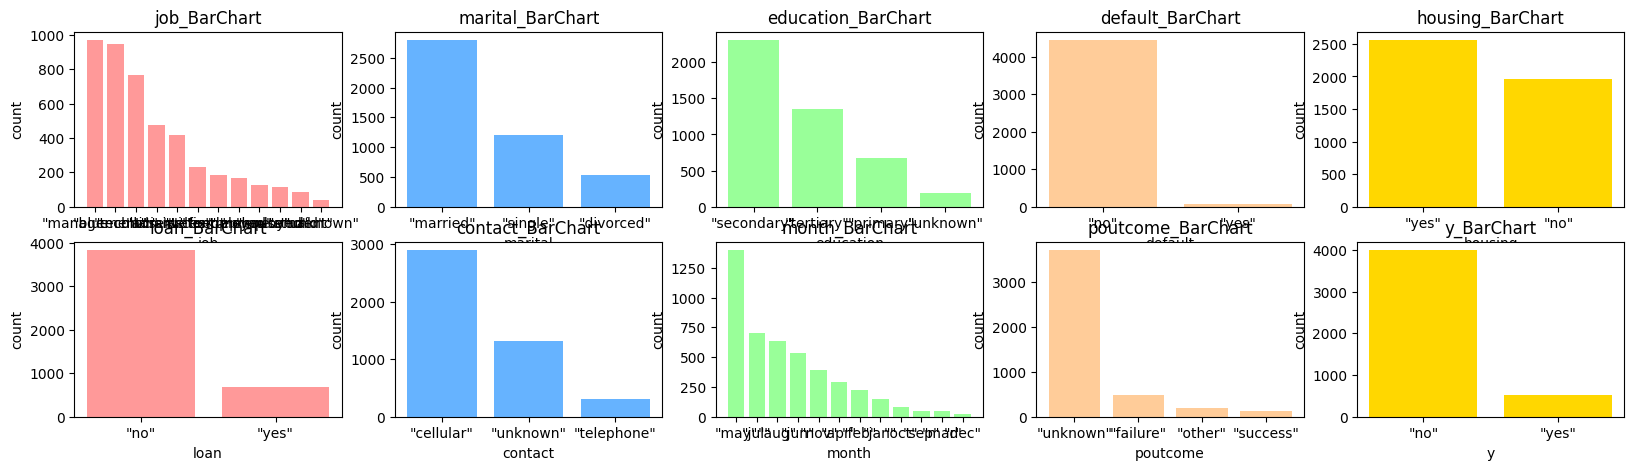

In [29]:
plt.figure(figsize=(20,5))
colors=['#FF9999','#66B3FF','#99FF99','#FFCC99','#FFD700']
for k in range(len(cat)):
    class_name=bank_df[cat[k]].value_counts().keys()
    class_freq=bank_df[cat[k]].value_counts().values
    plt.subplot(2,5,k+1)
    plt.bar(class_name,class_freq,color=colors[k % len(colors)])
    plt.title(f'{cat[k]}_BarChart')
    plt.xlabel(cat[k])   
    plt.ylabel('count')

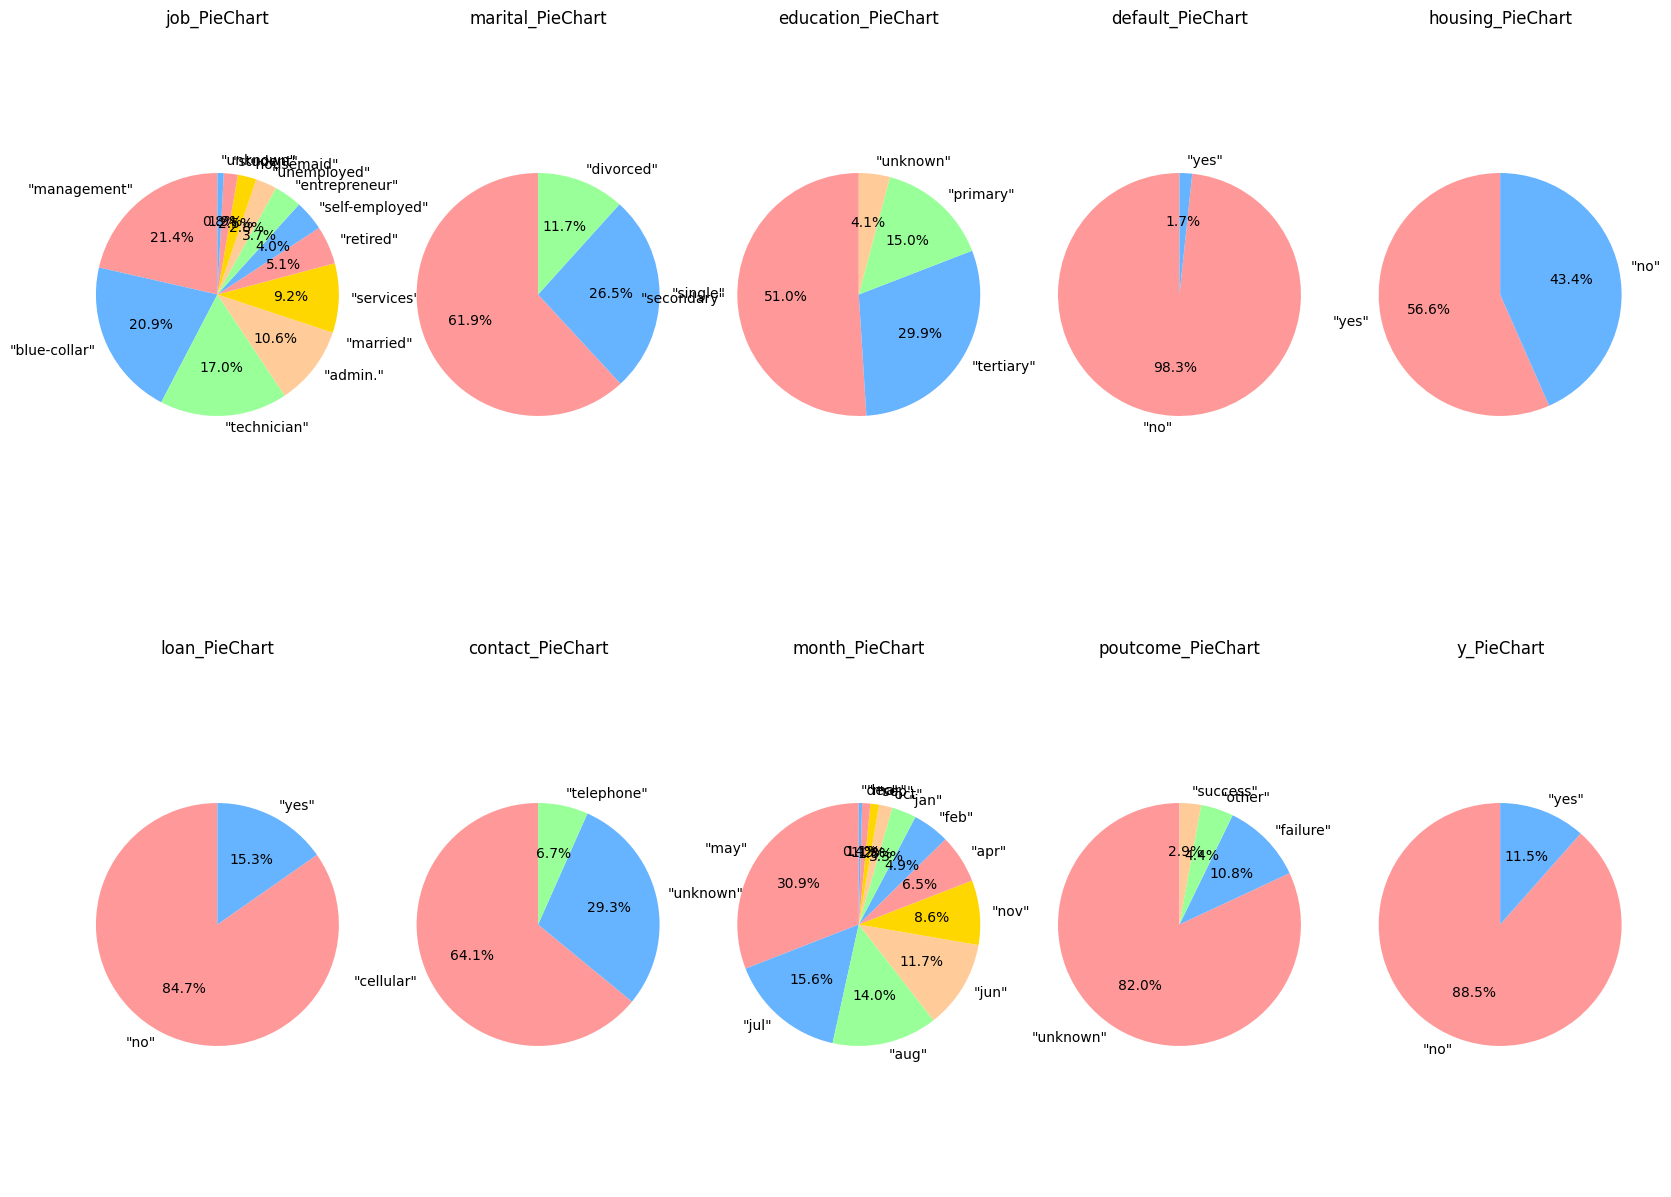

In [39]:
plt.figure(figsize=(20,15))
for k in range(len(cat)):
    class_name=bank_df[cat[k]].value_counts().keys()
    class_freq=bank_df[cat[k]].value_counts().values
    plt.subplot(2,5,k+1)
    plt.pie(class_freq, labels=class_name, colors=colors, startangle=90, autopct='%1.1f%%')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'{cat[k]}_PieChart')  # Use k instead of cat[k] for title
plt.show()  # Move plt.show() outside the loop to display all pie charts at once
